# Mode Preference Modelling

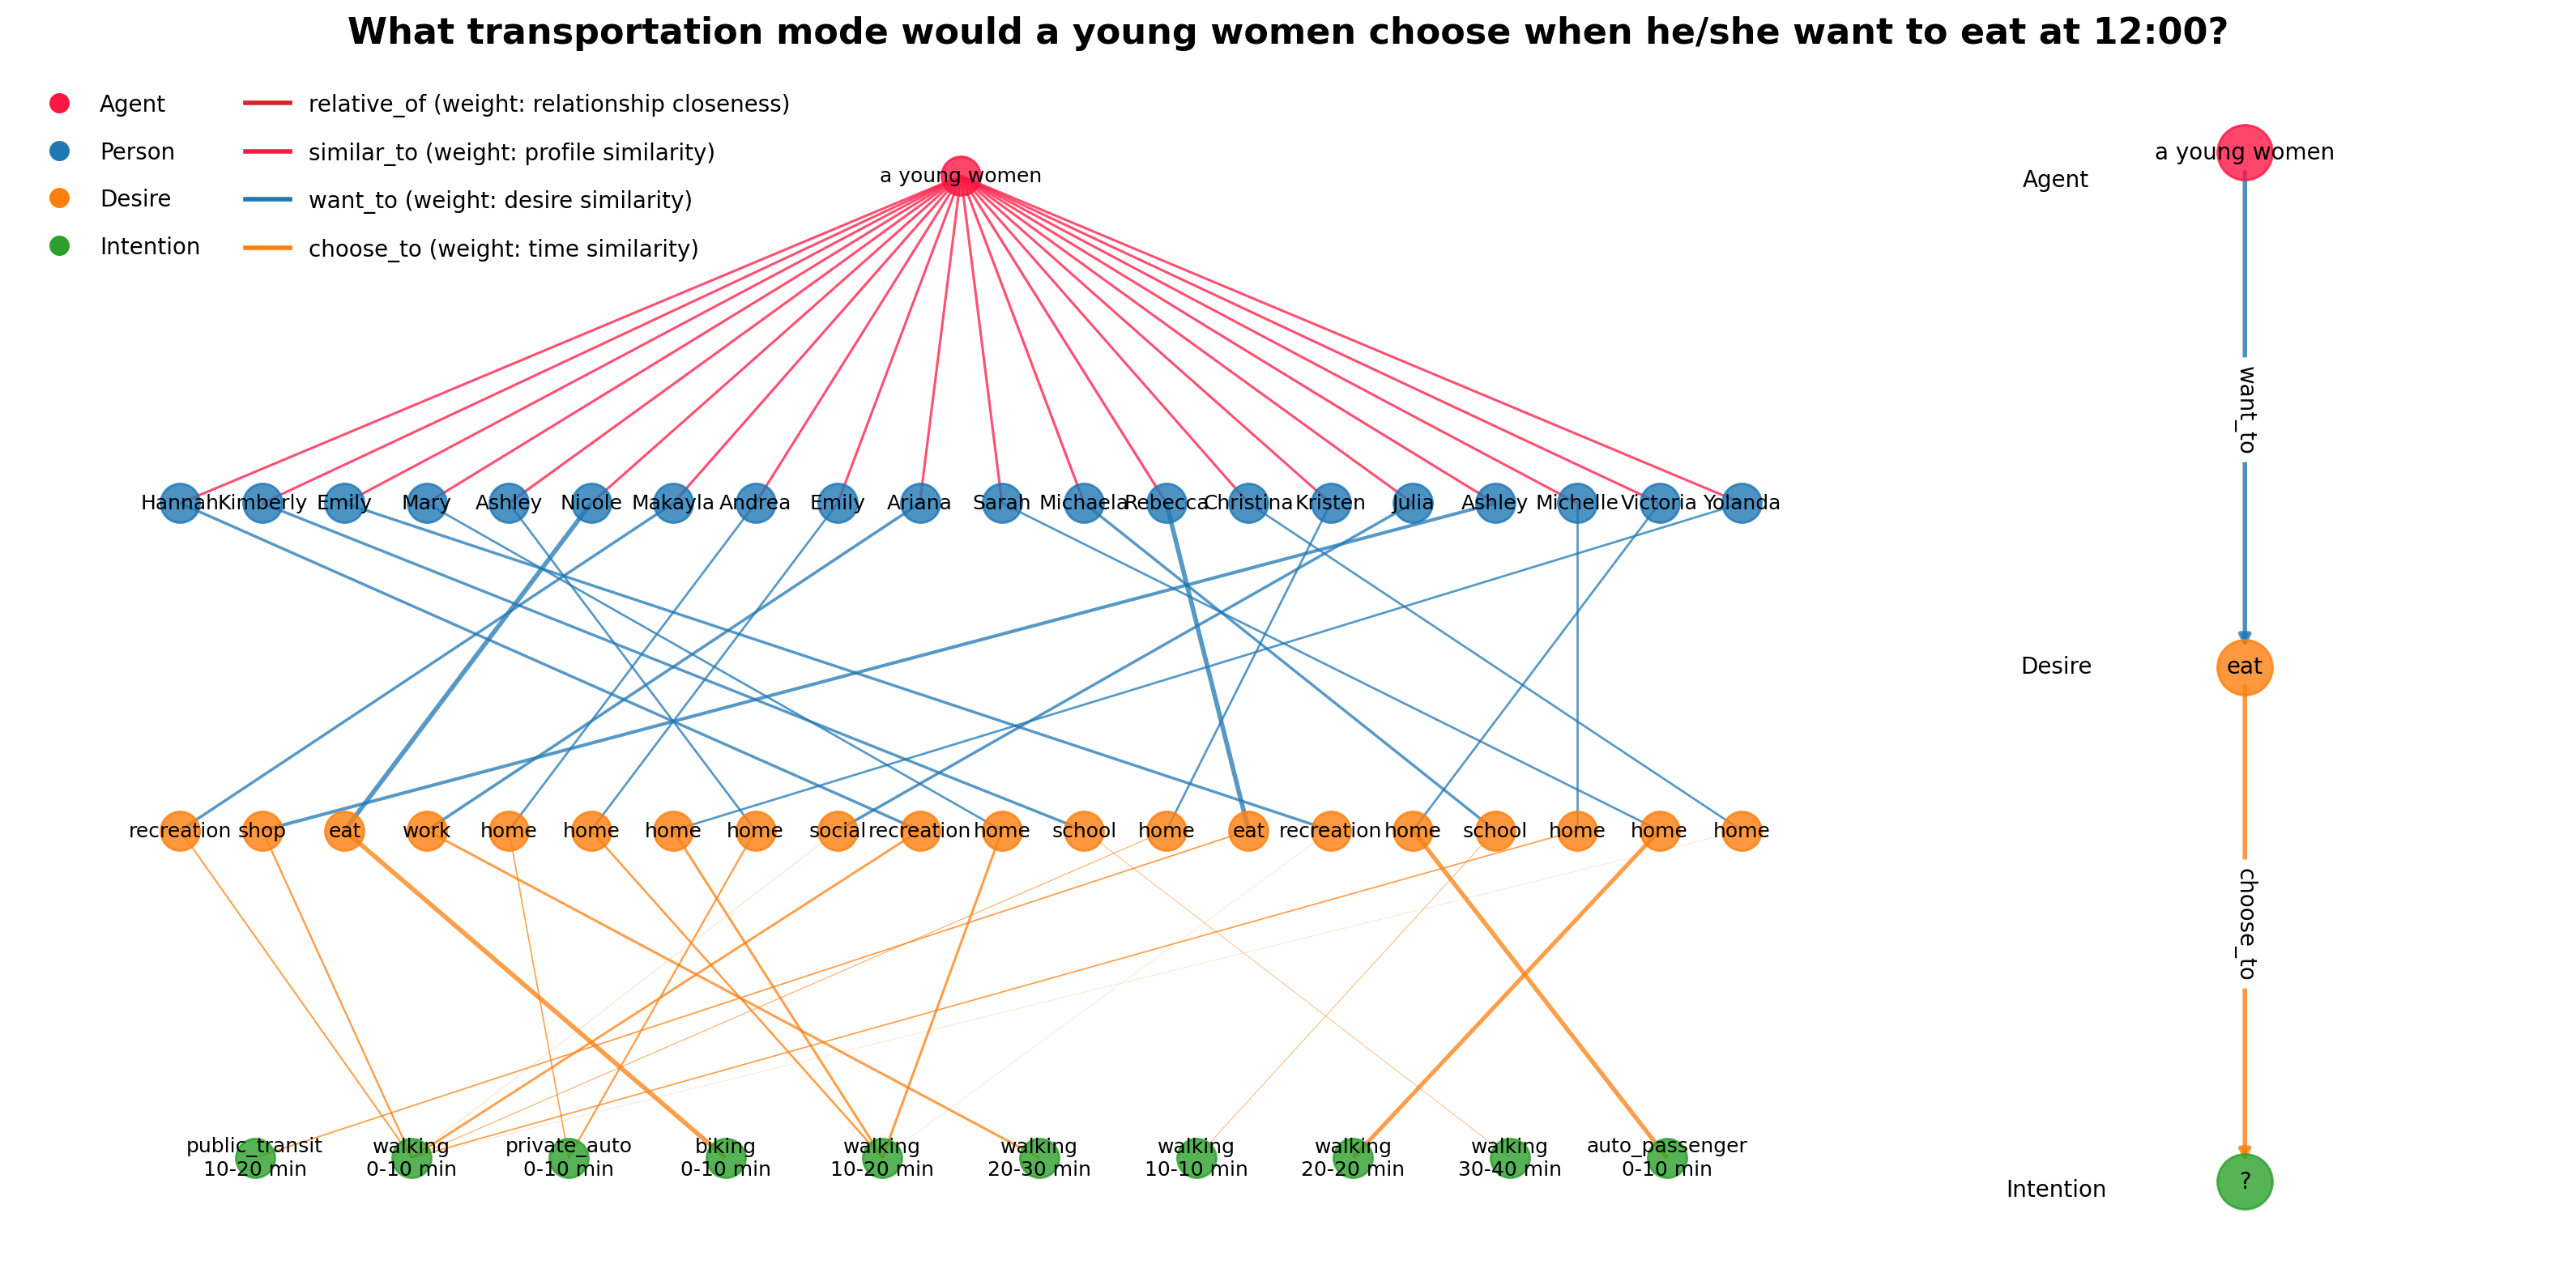

Transportation Mode Preference: [{'primary_mode': 'public_transit', 'duration_minutes': '10-20', 'weight': 0.06657495996541778}, {'primary_mode': 'walking', 'duration_minutes': '0-10', 'weight': 0.22115132300571846}, {'primary_mode': 'private_auto', 'duration_minutes': '0-10', 'weight': 0.06679977233858471}, {'primary_mode': 'biking', 'duration_minutes': '0-10', 'weight': 0.21319880781389922}, {'primary_mode': 'walking', 'duration_minutes': '10-20', 'weight': 0.14896945010220702}, {'primary_mode': 'walking', 'duration_minutes': '20-30', 'weight': 0.07053569828242448}, {'primary_mode': 'walking', 'duration_minutes': '10-10', 'weight': 0.014938027400194145}, {'primary_mode': 'walking', 'duration_minutes': '20-20', 'weight': 0.09031614330342637}, {'primary_mode': 'walking', 'duration_minutes': '30-40', 'weight': 0.012629417786720078}, {'primary_mode': 'auto_passenger', 'duration_minutes': '0-10', 'weight': 0.09488640000140769}]


In [1]:
from mobility_agent.graph import BehaviorGraph
graph = BehaviorGraph()

profile = "a young women"
desire = "eat"
time = 8
subgraph,weights = graph.preference_modelling(profile=profile,desire=desire,time=time)
graph.visualize_graph(subgraph)
print("Transportation Mode Preference:",weights)


# Agent-based Modelling

### Generate Profile

- The agent generate realistic profiles based on demongraphic data
- It then choose a random location as home wighted by cencus block population

In [1]:
from mobility_agent.agent import MobilityAgent

agent = MobilityAgent(city="Cambridge,MA")
print("Profile:",agent.profile)
print("Home:", agent.memory_locations)

Profile: {"name": "Michael Foley", "city": "Cambridge,MA", "age": 55, "gender": "male", "employment_status": "employed", "education": "advanced_degree", "household_size": 3, "household_income": "Under 25k", "available_vehicles": 1}

Home: {'home': {'name': 'home', 'coordinates': (42.36869203696399, -71.10736415697977)}}


### Create Time Schedule

- The agent first creates a full-day activity plan.

- For each activity, it searches for nearby points of interest (POIs) based on their profile, and prefered mode of transportation.

- It then selects the most suitable POI to visit and save it to the working meomory of the agent.

- The agent will save important locations such as home, work, school to `agent.memory_locations`

In [2]:
agent.get_time_schedule()
agent.time_schedule

[{'start_time': '07:43',
  'desire': 'work',
  'transportation': {'mode': 'walking', 'duration': '0-10'},
  'destination': {'name': 'Dado Tea',
   'distance_km': 0.21174975717204214,
   'coordinates': ('42.369111', '-71.109872')}},
 {'start_time': '10:05',
  'desire': 'shop',
  'transportation': {'mode': 'walking', 'duration': '20-30'},
  'destination': {'name': "Albert's Market",
   'distance_km': 1.7057780153404989,
   'coordinates': ('42.371765', '-71.087074')}},
 {'start_time': '11:22',
  'desire': 'eat',
  'transportation': {'mode': 'private_auto', 'duration': '0-10'},
  'destination': {'name': 'Dumpling House',
   'distance_km': 0.21085654911620486,
   'coordinates': ('42.368689', '-71.109924')}},
 {'start_time': '11:47',
  'desire': 'social',
  'transportation': {'mode': 'walking', 'duration': '0-10'},
  'destination': {'name': 'Kemsley Education',
   'distance_km': 0.28583087628974424,
   'coordinates': ('42.36876', '-71.110833')}},
 {'start_time': '12:22',
  'desire': 'work',


In [3]:
agent.working_memory

['Today is a normal weekday',
 'On 07:43, I want to work, I go to Dado Tea by walking which takes 0-10 minutes.',
 "On 10:05, I want to shop, I go to Albert's Market by walking which takes 20-30 minutes.",
 'On 11:22, I want to eat, I go to Dumpling House by private_auto which takes 0-10 minutes.',
 'On 11:47, I want to social, I go to Kemsley Education by walking which takes 0-10 minutes.',
 'On 12:22, I want to work, I go to Dado Tea by walking which takes 0-10 minutes.',
 'On 13:02, I want to recreation, I go to Clement G Morgan Park by walking which takes 0-10 minutes.',
 'On 15:30, I want to home, I go to home by walking which takes 0-10 minutes.',
 'On 18:10, I want to shop, I go to Daily Table Central Square by walking which takes 0-10 minutes.',
 'On 19:00, I want to home, I go to home by walking which takes 0-10 minutes.']

In [4]:
agent.memory_locations

{'home': {'name': 'home',
  'coordinates': (42.36869203696399, -71.10736415697977)},
 'work': {'name': 'Dado Tea',
  'coordinates': ('42.369111', '-71.109872'),
  'category': ''}}